## Spotify Data Analysis with SQL
This is the code which investigates Spotify Data of top songs from August 2019 which can be found [here](http://https://www.kaggle.com/datasets/leonardopena/top50spotify2019). This notebook uses the '*sqlite3*' library in Python to investigate through different areas in the data to find the pattern in what technicalities lead to the song being resistered in the 'Top Songs' playlist on Spotify.

Later this project will be extended involving my personal Spotify data, where I would explore all the technicalities related to my personal Spotify data. The main aim for this project is to explore SQL in depth in order to investigate data in an effecient manner.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import seaborn as sns # for plotting

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1. Investigating the spotify data from [Kaggle](http://https://www.kaggle.com/datasets/leonardopena/top50spotify2019)

The  .csv file is converted into a Pandas DataFrame where we can explore the data using the different methods provided by Pandas. Also, SQL queries can be ammended if we are using a DataFrame.

In [2]:
# Make a pandas DataFrame using the .csv file
df = pd.read_csv('/kaggle/input/top50spotify2019/top50.csv', encoding="ISO-8859-1", index_col=[0])

# Clean the data as per the requirement
df.columns = df.columns.str.strip()
# Replace periods with blank
df.columns = df.columns.str.replace(".", "")

# View the DataFrame
df.head()

/tmp/ipykernel_32/1521505457.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(".", "")


,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,LoudnessdB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


From the ouput it is understood that there are 13 columns representing technical details of every track in the data including 'ArtistName', 'TrackName', 'BeatsPerMinute', 'Popularity' and others. There are 50 tracks in total ranking in descending order of their ranks.

Firstly, in order to use SQL and apply all the queries on the given data, we need to connect to a database using the *sqlite3* library. Then with the cursor created from the database, we can explore the SQL queries accordingly as seen below.

In [3]:
# Connect to database
conn = sqlite3.connect('database.db')
c = conn.cursor()

Now, in order to use the queries, we need an SQL table which we can get by using the Pandas DataFrame.

In [4]:
# Convert pandas DataFrame into SQL table
df.to_sql("TopSongs", conn)

50

We have a SQL table from the Pandas DataFrame, which can be explored using simple SQL queries, which can be applied in this notebook as follows: 

In [5]:
# Write a query to see what the table looks like
c.execute('''
            SELECT *
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,index,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,LoudnessdB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


### Artists
Firstly, lets look at the artists with their songs in the 'TopSongs' list. This can be done using a simple SQL query applied and seen. From the result it is seen that there are 9 artists with more than one tracks in the TopSongs playlist with only one artist with four tracks in the same.

In [6]:
# Query the artists with the Top Songs and count the number of top songs each artist has
c.execute('''
            SELECT ArtistName, COUNT(*)
            FROM TopSongs
            GROUP BY ArtistName
            ORDER BY COUNT(*) DESC;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,ArtistName,COUNT(*)
0,Ed Sheeran,4
1,The Chainsmokers,2
2,Shawn Mendes,2
3,Sech,2
4,Post Malone,2
5,Marshmello,2
6,Lil Nas X,2
7,J Balvin,2
8,Billie Eilish,2
9,Ariana Grande,2


Upon a cursory examination of the provided data table, keen observers may discern an interesting pattern: certain songs incorporate the name of a featured artist within their TrackName. The ensuing code snippet is designed to quantitatively elucidate this observation by determining the count of songs within the top 50 Spotify tracks that indeed feature a collaborating artist on the track.

In [7]:
# Query the number of songs that have other artists features in the song
c.execute('''
            SELECT COUNT(*)
            FROM TopSongs
            WHERE TrackName LIKE '%feat%' OR TrackName LIKE '%ft.%' OR TrackName LIKE "%(with%";
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,COUNT(*)
0,13


A discerning examination of the dataset reveals that 13 out of the top Spotify songs, constituting 26% of the dataset, incorporate featured artists in their compositions. This observation prompts speculation regarding the potential influence of featuring artists on a track's propensity to secure a position among the Spotify Top 50 songs.

### Genre
Next lets look at the 'Genre', by exploring the kind of genre there are in the 'TopSongs' playlist.

In [8]:
# Query the Genres that appear in the TopSongs
c.execute('''
            SELECT Genre, COUNT(*)
            FROM TopSongs
            GROUP BY GENRE
            ORDER BY COUNT(*) DESC;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,Genre,COUNT(*)
0,dance pop,8
1,pop,7
2,latin,5
3,edm,3
4,canadian hip hop,3
5,reggaeton flow,2
6,reggaeton,2
7,panamanian pop,2
8,electropop,2
9,dfw rap,2


'Dance Pop' is the genre with 8 tracks in the list with 'Pop' and 'Latin' next to it with 7 and 5 tracks in the top list. There are mostly versions of 'Pop' which are having more than 2 songs in the top song list. Lets explore the how many songs are there in the list with version of pop songs.

In [9]:
# Query the number of songs that have the word 'pop' in their genre
c.execute('''
            SELECT COUNT(*) As 'PopSongs'
            FROM TopSongs
            WHERE Genre LIKE '%pop%';
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,PopSongs
0,23


Within the context of the Spotify Top 50 songs dataset, a noteworthy observation emerges: specifically, 23 songs prominently incorporate the term 'pop' within their nomenclature. This finding underscores a significant trend, where nearly half of the songs comprising the Spotify Top 50 can be categorized as either conventional pop songs or variants thereof. This notable prevalence of pop-themed songs within the upper echelons of the Spotify chart invites a contemplative inquiry into the potential correlation between the genre's popularity and its recurrent presence within this coveted list.

The word 'Rap' and 'Hip Hop' also appears a lot in the top genres, lets explore that in the same way as we explored 'pop'.

In [10]:
# Query the number of songs that have the word 'rap' in their genre
c.execute('''
            SELECT COUNT(*)As RapSongs
            FROM TopSongs
            WHERE genre LIKE '%rap%';
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,RapSongs
0,5


An observation within the dataset of Spotify's Top 50 songs warrants attention: specifically, it comprises a subset of 5 songs, collectively representing 10 percent of the entire dataset, that can be categorized as either conventional rap songs or derivatives of the rap genre. While this proportion is not as substantial as the prevalence of pop-themed songs within the dataset, it is noteworthy that rap songs, albeit in a smaller quantity, also establish a presence among the top-performing tracks on Spotify. This observation underscores the diverse musical landscape within the context of the Spotify Top 50 songs, where multiple genres exhibit a capacity to thrive.

In [11]:
# Query the number of songs that have the word 'hip hop' in their genre
c.execute('''
            SELECT COUNT(*) As HipHopSongs
            FROM TopSongs
            WHERE Genre LIKE '%hip hop%';
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,HipHopSongs
0,4


There were just four songs with ‘hip hop’ in the genre but this is still 8%. 

In [12]:
# Query the number of songs that have the word 'reggaeton' in their genre
c.execute('''
            SELECT COUNT(*) As ReggaetonSongs
            FROM TopSongs
            WHERE Genre LIKE '%reggaeton%';
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,ReggaetonSongs
0,4


### Beats Per Minute
The potential influence of beats per minute (BPM) on a song's inclusion within Spotify's Top 50 songs merits investigation. The ensuing code segment is devised to furnish the average BPM measurement calculated across the top 50 Spotify songs. This analysis seeks to shed light on the significance of BPM as a contributing factor in determining a song's eligibility for inclusion among the esteemed ranks of Spotify's most-played tracks.

In [13]:
# Query the average BeatsPerMin in TopSongs
c.execute('''
            SELECT AVG(BeatsPerMinute)
            FROM TopSongs
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,AVG(BeatsPerMinute)
0,120.06


The calculated average beats per minute (BPM) for the top 50 songs on Spotify is quantified at 120.06. Subsequently, the provided code snippet is designed to categorize each song within the dataset based on their BPM in relation to this computed average. It is imperative to recognize that the dataset's song order aligns with their respective ranking on Spotify, implying that the foremost entry represents the most-played song at the moment when this dataset was compiled.

In [14]:
# Look at the top songs to see if they are abpve or below the average BeatsPerMinute
c.execute('''
            SELECT TrackName, BeatsPerMinute,
            (CASE
                WHEN BeatsPerMinute > 120.06 THEN 'Above Average'
                WHEN BeatsPerMinute = 120.06 THEN 'Average'
                WHEN BeatsPerMinute < 120.06 THEN 'Below Average'
            END) As CompareAvg
            FROM TopSongs
            LIMIT 15;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,TrackName,BeatsPerMinute,CompareAvg
0,Señorita,117,Below Average
1,China,105,Below Average
2,boyfriend (with Social House),190,Above Average
3,Beautiful People (feat. Khalid),93,Below Average
4,Goodbyes (Feat. Young Thug),150,Above Average
5,I Don't Care (with Justin Bieber),102,Below Average
6,Ransom,180,Above Average
7,How Do You Sleep?,111,Below Average
8,Old Town Road - Remix,136,Above Average
9,bad guy,135,Above Average


Within the uppermost tier of the top ten songs, a discernible pattern emerges: precisely half of these songs exhibit beats per minute (BPM) values surpassing the computed average, while the remaining half register BPM figures below the established average. The ensuing examination will delve into quantifying the extent of disparity between each song's BPM measurement and the computed average, thereby providing a comprehensive insight into the rhythmic characteristics of this select subset of songs.

In [15]:
# Look at the top songs to see how far away they are from the average BeatsPerMinute
c.execute('''
            SELECT TrackName, BeatsPerMinute,
            (CASE
                WHEN BeatsPerMinute BETWEEN 110.06 and 130.06 THEN 'Within 10'
                WHEN (BeatsPerMinute BETWEEN 100.06 and 110.06) OR (BeatsPerMinute BETWEEN 130.06 and 140.06) THEN 'Within 20'
                WHEN (BeatsPerMinute BETWEEN 90.06 and 100.06) OR (BeatsPerMinute BETWEEN 140.06 and 150.06) THEN 'Within 30'
                ELSE 'Greater than 30'
            END) As CompareAverage
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,TrackName,BeatsPerMinute,CompareAverage
0,Señorita,117,Within 10
1,China,105,Within 20
2,boyfriend (with Social House),190,Greater than 30
3,Beautiful People (feat. Khalid),93,Within 30
4,Goodbyes (Feat. Young Thug),150,Within 30
5,I Don't Care (with Justin Bieber),102,Within 20
6,Ransom,180,Greater than 30
7,How Do You Sleep?,111,Within 10
8,Old Town Road - Remix,136,Within 20
9,bad guy,135,Within 20


While the examination of individual songs provides valuable insights, a comprehensive perspective often necessitates a broader view encompassing all songs in the dataset. To facilitate this holistic analysis, the forthcoming code segment has been devised. It endeavors to categorize songs based on their proximity to the calculated average beats per minute (BPM) in incremental intervals of 10 beats per minute. Specifically, it will determine the number of songs falling within 10 BPM, 20 BPM, and 30 BPM of the average, as well as the count of songs whose BPM deviates by more than 30 from the computed average. This approach affords a more comprehensive understanding of the distribution of BPM values within the entire dataset, thereby enabling a more insightful exploration of rhythmic characteristics across the board.

In [16]:
# Count down all the songs as per their 'BeatsPerMinute' range
c.execute('''
            SELECT
            SUM(CASE
                WHEN BeatsPerMinute BETWEEN 110.06 AND 130.06 THEN 1
                ELSE 0
            END) As Within10,
            SUM(CASE
                WHEN (BeatsPerMinute BETWEEN 100.06 AND 110.05) OR (BeatsPerMinute BETWEEN 130.07 AND 140.06) THEN 1
                ELSE 0
            END) As Within20,
            SUM(CASE
                WHEN (BeatsPerMinute BETWEEN 90.06 AND 100.05) OR (BeatsPerMinute BETWEEN 140.07 AND 150.06) THEN 1
                ELSE 0
            END) As Within30,
            SUM(CASE
                WHEN (BeatsPerMinute < 90.06) OR (BeatsPerMinute > 150.06) THEN 1
                ELSE 0
            END) As Greater30
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,Within10,Within20,Within30,Greater30
0,6,12,18,14


There is no obvious pattern here. Perhaps the beats per minute is not a big factor in being a top 50 Spotify song.

### Energy
Now lets explore the 'Energy' section of the data. First, lets find out the average energy of all the sons in the playlist.

In [17]:
# Query the average energy in TopSongs
c.execute('''
            SELECT AVG(Energy)
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,AVG(Energy)
0,64.06


The computed average energy level for songs included within Spotify's Top 50 chart registers at 64.06. Subsequently, the provided code snippet has been designed with the objective of categorizing each song within the dataset based on their energy levels in relation to this calculated average. Specifically, the code will classify songs as either exhibiting energy levels surpassing the computed average, energy levels below the computed average, or energy levels equivalent to the computed average. This systematic categorization aims to facilitate a nuanced understanding of the energy distribution characteristics across the songs featured in the dataset.

In [18]:
# Look at the top songs to see if they are abpve or below the average Energy
c.execute('''
            SELECT TrackName, Energy,
            (CASE
                WHEN Energy > 64.06 THEN 'Above Average'
                WHEN Energy = 64.06 THEN 'Average'
                WHEN Energy < 64.06 THEN 'Below Average'
            END) As CompareAvg
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,TrackName,Energy,CompareAvg
0,Señorita,55,Below Average
1,China,81,Above Average
2,boyfriend (with Social House),80,Above Average
3,Beautiful People (feat. Khalid),65,Above Average
4,Goodbyes (Feat. Young Thug),65,Above Average
5,I Don't Care (with Justin Bieber),68,Above Average
6,Ransom,64,Below Average
7,How Do You Sleep?,68,Above Average
8,Old Town Road - Remix,62,Below Average
9,bad guy,43,Below Average


Within the upper echelons of the top 10 songs, an intriguing pattern unfolds: nearly half of these songs exhibit energy levels exceeding the computed average, while an equivalent fraction registers energy levels below the calculated average. In light of this observation, the subsequent analysis endeavors to assign specific labels to each of these songs, quantifying the extent to which their energy levels deviate from the computed average. This granular categorization will provide a more detailed perspective on the distribution of energy levels within this select subgroup of songs, thereby enhancing our comprehension of their sonic characteristics.

In [19]:
# Look at the top songs to see how far away they are from the average Energy
c.execute('''
            SELECT TrackName, Energy,
            (CASE
                WHEN Energy BETWEEN 54.06 and 74.06 THEN 'Within 10'
                WHEN (Energy BETWEEN 44.06 and 54.05) OR (Energy BETWEEN 74.07 and 84.06) THEN 'Within 20'
                WHEN (Energy BETWEEN 34.06 and 44.05) OR (Energy BETWEEN 84.07 and 94.06) THEN 'Within 30'
                ELSE 'Greater than 30'
            END) As CompareAverage
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,TrackName,Energy,CompareAverage
0,Señorita,55,Within 10
1,China,81,Within 20
2,boyfriend (with Social House),80,Within 20
3,Beautiful People (feat. Khalid),65,Within 10
4,Goodbyes (Feat. Young Thug),65,Within 10
5,I Don't Care (with Justin Bieber),68,Within 10
6,Ransom,64,Within 10
7,How Do You Sleep?,68,Within 10
8,Old Town Road - Remix,62,Within 10
9,bad guy,43,Within 30


The data analysis reveals a prevalent pattern where numerous songs exhibit energy levels falling within a range of 10 units in proximity to the computed average energy. To gain a comprehensive understanding of the energy statistics across the entirety of the dataset, the ensuing code segment is provided. This code serves as a tool to assess the energy characteristics of the entire dataset, thus allowing for a more comprehensive evaluation of energy level distribution across the songs.

In [20]:
# Count down all the songs as per their 'Energy' range
c.execute('''
            SELECT
            SUM(CASE
                WHEN Energy BETWEEN 54.06 AND 74.06 THEN 1
                ELSE 0
            END) As Within10,
            SUM(CASE
                WHEN (Energy BETWEEN 44.06 AND 54.05) OR (Energy BETWEEN 74.07 AND 84.06) THEN 1
                ELSE 0
            END) As Within20,
            SUM(CASE
                WHEN (Energy BETWEEN 34.06 AND 44.05) OR (Energy BETWEEN 84.07 AND 94.06) THEN 1
                ELSE 0
            END) As Within30,
            SUM(CASE
                WHEN (Energy < 34.06) OR (Energy > 94.06) THEN 1
                ELSE 0
            END) As Greater30
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,Within10,Within20,Within30,Greater30
0,25,17,7,1


An insightful observation emerges from the dataset analysis, revealing that a substantial portion of the songs, specifically 50%, exhibit energy scores closely aligned within a range of 10 units in proximity to the computed average energy score of 64.06. Additionally, 34% of the songs manifest energy scores falling within 20 units of the calculated average. This observation suggests a potential correlation between the proximity of a song's energy score to the computed average of 64.06 and its likelihood of achieving a prominent status within Spotify's Top 50 chart.

### Danceability
The forthcoming analysis delves into the realm of danceability, a pivotal characteristic in the realm of music. The provided code segment serves the purpose of quantifying the average danceability score across the top 50 songs within Spotify's chart. This statistical examination aims to offer insights into the prevailing danceability trends among the songs featured in this esteemed collection.

In [21]:
# Query the average Danceability in TopSongs
c.execute('''
            SELECT AVG(Danceability)
            FROM TopSongs
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,AVG(Danceability)
0,71.38


The dataset analysis yields an average danceability score of 71.38 for the songs encompassed within this dataset. To facilitate a comprehensive understanding of the danceability characteristics exhibited by individual songs, the provided code segment is designed to categorize each song based on the proximity of its danceability score in relation to the computed average. This systematic labeling process enables a nuanced assessment of the extent to which each song's danceability score aligns with the established average, thereby enhancing our comprehension of danceability trends across the dataset.

In [22]:
# Look at the top songs to see if they are above or below the average Danceability
c.execute('''
            SELECT TrackName, Danceability,
            (CASE
                WHEN Danceability > 71.38 THEN 'Above Average'
                WHEN Danceability = 71.38 THEN 'Average'
                WHEN Danceability < 71.38 THEN 'Below Average'
            END) As CompareAvg
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,TrackName,Danceability,CompareAvg
0,Señorita,76,Above Average
1,China,79,Above Average
2,boyfriend (with Social House),40,Below Average
3,Beautiful People (feat. Khalid),64,Below Average
4,Goodbyes (Feat. Young Thug),58,Below Average
5,I Don't Care (with Justin Bieber),80,Above Average
6,Ransom,75,Above Average
7,How Do You Sleep?,48,Below Average
8,Old Town Road - Remix,88,Above Average
9,bad guy,70,Below Average


In [23]:
# Look at the top songs to see how far away they are from the average Danceability
c.execute('''
            SELECT TrackName, Danceability,
            (CASE
                WHEN Danceability BETWEEN 61.38 and 81.38 THEN 'Within 10'
                WHEN (Danceability BETWEEN 51.38 and 61.37) OR (Danceability BETWEEN 81.39 and 91.38) THEN 'Within 20'
                WHEN (Danceability BETWEEN 41.38 and 51.37) OR (Danceability BETWEEN 91.39 and 101.38) THEN 'Within 30'
                ELSE 'Greater than 30'
            END) As CompareAverage
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,TrackName,Danceability,CompareAverage
0,Señorita,76,Within 10
1,China,79,Within 10
2,boyfriend (with Social House),40,Greater than 30
3,Beautiful People (feat. Khalid),64,Within 10
4,Goodbyes (Feat. Young Thug),58,Within 20
5,I Don't Care (with Justin Bieber),80,Within 10
6,Ransom,75,Within 10
7,How Do You Sleep?,48,Within 30
8,Old Town Road - Remix,88,Within 20
9,bad guy,70,Within 10


An analogous pattern to the 'energy' attribute emerges with regard to danceability scores, wherein a considerable number of songs exhibit danceability scores within a proximity of 10 units to the computed average danceability score. To gain a comprehensive overview of the danceability statistics spanning the entire dataset, the provided code segment proves to be a valuable tool. This code facilitates a holistic assessment of the danceability characteristics prevalent across all songs in the dataset, enabling a thorough evaluation of their danceability score distribution.

In [24]:
# Count down all the songs as per their 'Danceability' range
c.execute('''
            SELECT
            SUM(CASE
                WHEN Danceability BETWEEN 61.38 AND 81.38 THEN 1
                ELSE 0
            END) As Within10,
            SUM(CASE
                WHEN (Danceability BETWEEN 51.38 AND 61.37) OR (Danceability BETWEEN 81.39 AND 91.38) THEN 1
                ELSE 0
            END) As Within20,
            SUM(CASE
                WHEN (Danceability BETWEEN 41.38 AND 51.37) OR (Danceability BETWEEN 91.39 AND 101.38) THEN 1
                ELSE 0
            END) As Within30,
            SUM(CASE
                WHEN (Danceability < 41.38) OR (Danceability > 101.38) THEN 1
                ELSE 0
            END) As Greater30
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,Within10,Within20,Within30,Greater30
0,34,12,2,2


The dataset analysis reveals a notable trend where a substantial proportion, specifically 68%, of the songs within the dataset exhibit danceability scores that fall within a range of 10 units in proximity to the computed average danceability score of 71.38. This observation suggests a potential association between the proximity of a song's danceability score to the computed average and its likelihood of securing a position within Spotify's Top 50 songs.

### LoudnessdB
Now lets continue the investigation by looking at the 'LoudnessdB' column. We'll go with the same procedure, wherein we'll calculate the average and explore the tracks around the average.

In [25]:
# Query the average loudness in the TopSongs
c.execute('''
            SELECT AVG(LoudnessdB)
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,AVG(LoudnessdB)
0,-5.66


This analysis yeilds that the average loundness in decibals is around -5.66 for the songs encompassed within this dataset. To facilitate a comprehensive understanding of the loudness in decibals characteristics exhibited by individual songs, the provided code segment is designed to categorize each song based on the proximity of its loudness score in relation to the computed average. This systematic labeling process enables a nuanced assessment of the extent to which each song's loudness score aligns with the established average, thereby enhancing our comprehension of loudness trends across the dataset.

In [26]:
# Look at the top songs to see if they are above or below the average LoudnessdB
c.execute('''
            SELECT TrackName, LoudnessdB,
            (CASE
                WHEN LoudnessdB > -5.66 THEN 'Above Average'
                WHEN LoudnessdB = -5.66 THEN 'Average'
                WHEN LoudnessdB < -5.66 THEN 'Below Average'
            END) As CompareAvg
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,TrackName,LoudnessdB,CompareAvg
0,Señorita,-6,Below Average
1,China,-4,Above Average
2,boyfriend (with Social House),-4,Above Average
3,Beautiful People (feat. Khalid),-8,Below Average
4,Goodbyes (Feat. Young Thug),-4,Above Average
5,I Don't Care (with Justin Bieber),-5,Above Average
6,Ransom,-6,Below Average
7,How Do You Sleep?,-5,Above Average
8,Old Town Road - Remix,-6,Below Average
9,bad guy,-11,Below Average


In [27]:
# # Look at the top songs to see how far away they are from the average LoudnessdB
c.execute('''
            SELECT TrackName, LoudnessdB,
            (CASE
                WHEN LoudnessdB BETWEEN -6.66 and -4.66 THEN 'Within 1'
                WHEN (LoudnessdB BETWEEN -7.66 and -6.67) OR (LoudnessdB BETWEEN -4.65 and -3.66) THEN 'Within 2'
                WHEN (LoudnessdB BETWEEN -8.66 and -9.67) OR (LoudnessdB BETWEEN -3.65 and -2.66) THEN 'Within 3'
                ELSE 'Greater than 3'
            END) As CompareAverage
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,TrackName,LoudnessdB,CompareAverage
0,Señorita,-6,Within 1
1,China,-4,Within 2
2,boyfriend (with Social House),-4,Within 2
3,Beautiful People (feat. Khalid),-8,Greater than 3
4,Goodbyes (Feat. Young Thug),-4,Within 2
5,I Don't Care (with Justin Bieber),-5,Within 1
6,Ransom,-6,Within 1
7,How Do You Sleep?,-5,Within 1
8,Old Town Road - Remix,-6,Within 1
9,bad guy,-11,Greater than 3


In [28]:
# Count down all the songs as per their 'LoudnessdB' range
c.execute('''
            SELECT
            SUM(CASE
                WHEN LoudnessdB BETWEEN -6.66 AND -4.66 THEN 1
                ELSE 0
            END) As Within1,
            SUM(CASE
                WHEN (LoudnessdB BETWEEN -7.66 AND -6.65) OR (LoudnessdB BETWEEN -4.65 AND -3.66) THEN 1
                ELSE 0
            END) As Within2,
            SUM(CASE
                WHEN (LoudnessdB BETWEEN -8.66 AND -7.65) OR (LoudnessdB BETWEEN -3.65 AND -2.66) THEN 1
                ELSE 0
            END) As Within3,
            SUM(CASE
                WHEN (LoudnessdB < -8.66) OR (LoudnessdB > -2.66) THEN 1
                ELSE 0
            END) As Greater3
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,Within1,Within2,Within3,Greater3
0,21,17,6,6


In [29]:
# Query the average Liveness in TopSongs
c.execute('''
            SELECT AVG(Liveness)
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,AVG(Liveness)
0,14.66


In [30]:
# Look at the top songs to see if they are above or below the average Liveness
c.execute('''
            SELECT TrackName, Liveness,
            (CASE
                WHEN Liveness > 14.66 THEN 'Above Average'
                WHEN Liveness = 14.66 THEN 'Average'
                WHEN Liveness < 14.66 THEN 'Below Average'
            END) As CompareAvg
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,TrackName,Liveness,CompareAvg
0,Señorita,8,Below Average
1,China,8,Below Average
2,boyfriend (with Social House),16,Above Average
3,Beautiful People (feat. Khalid),8,Below Average
4,Goodbyes (Feat. Young Thug),11,Below Average
5,I Don't Care (with Justin Bieber),9,Below Average
6,Ransom,7,Below Average
7,How Do You Sleep?,8,Below Average
8,Old Town Road - Remix,11,Below Average
9,bad guy,10,Below Average


In [31]:
# # Look at the top songs to see how far away they are from the average Liveness
c.execute('''
            SELECT TrackName, Liveness,
            (CASE
                WHEN Liveness BETWEEN 11.66 and 17.66 THEN 'Within 3'
                WHEN (Liveness BETWEEN 8.66 and 11.65) OR (Liveness BETWEEN 17.67 and 20.66) THEN 'Within 6'
                WHEN (Liveness BETWEEN 5.66 and 8.65) OR (Liveness BETWEEN 20.67 and 23.66) THEN 'Within 9'
                ELSE 'Greater than 9'
            END) As CompareAverage
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,TrackName,Liveness,CompareAverage
0,Señorita,8,Within 9
1,China,8,Within 9
2,boyfriend (with Social House),16,Within 3
3,Beautiful People (feat. Khalid),8,Within 9
4,Goodbyes (Feat. Young Thug),11,Within 6
5,I Don't Care (with Justin Bieber),9,Within 6
6,Ransom,7,Within 9
7,How Do You Sleep?,8,Within 9
8,Old Town Road - Remix,11,Within 6
9,bad guy,10,Within 6


In [32]:
# Count down all the songs as per their 'Liveness' range
c.execute('''
            SELECT
            SUM(CASE
                WHEN Liveness BETWEEN 11.66 AND 17.66 THEN 1
                ELSE 0
            END) As Within3,
            SUM(CASE
                WHEN (Liveness BETWEEN 8.66 AND 11.65) OR (Liveness BETWEEN 17.67 AND 20.66) THEN 1
                ELSE 0
            END) As Within6,
            SUM(CASE
                WHEN (Liveness BETWEEN 5.66 AND 8.65) OR (Liveness BETWEEN 20.67 AND 23.66) THEN 1
                ELSE 0
            END) As Within9,
            SUM(CASE
                WHEN (Liveness < 5.66) OR (Liveness > 23.66) THEN 1
                ELSE 0
            END) As Greater9
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,Within3,Within6,Within9,Greater9
0,12,15,15,8


In [33]:
# Query the average Valence in TopSongs
c.execute('''
            SELECT AVG(Valence)
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,AVG(Valence)
0,54.6


In [34]:
# Look at the top songs to see if they are above or below the average Valence
c.execute('''
            SELECT TrackName, Valence,
            (CASE
                WHEN Valence > 54.6 THEN 'Above Average'
                WHEN Valence = 54.6 THEN 'Average'
                WHEN Valence < 54.6 THEN 'Below Average'
            END) As CompareAvg
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,TrackName,Valence,CompareAvg
0,Señorita,75,Above Average
1,China,61,Above Average
2,boyfriend (with Social House),70,Above Average
3,Beautiful People (feat. Khalid),55,Above Average
4,Goodbyes (Feat. Young Thug),18,Below Average
5,I Don't Care (with Justin Bieber),84,Above Average
6,Ransom,23,Below Average
7,How Do You Sleep?,35,Below Average
8,Old Town Road - Remix,64,Above Average
9,bad guy,56,Above Average


In [35]:
# Look at the top songs to see how far away they are from the average Valence
c.execute('''
            SELECT TrackName, Valence,
            (CASE
                WHEN Valence BETWEEN 49.6 and 59.6 THEN 'Within 5'
                WHEN (Valence BETWEEN 44.6 and 49.5) OR (Valence BETWEEN 59.7 and 64.6) THEN 'Within 10'
                WHEN (Valence BETWEEN 39.6 and 44.5) OR (Valence BETWEEN 64.7 and 69.66) THEN 'Within 15'
                ELSE 'Greater than 15'
            END) As CompareAverage
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,TrackName,Valence,CompareAverage
0,Señorita,75,Greater than 15
1,China,61,Within 10
2,boyfriend (with Social House),70,Greater than 15
3,Beautiful People (feat. Khalid),55,Within 5
4,Goodbyes (Feat. Young Thug),18,Greater than 15
5,I Don't Care (with Justin Bieber),84,Greater than 15
6,Ransom,23,Greater than 15
7,How Do You Sleep?,35,Greater than 15
8,Old Town Road - Remix,64,Within 10
9,bad guy,56,Within 5


In [36]:
# Count down all the songs as per their 'Valence' range
c.execute('''
            SELECT
            SUM(CASE
                WHEN Valence BETWEEN 49.6 AND 59.6 THEN 1
                ELSE 0
            END) As Within5,
            SUM(CASE
                WHEN (Valence BETWEEN 44.6 AND 49.5) OR (Valence BETWEEN 59.7 AND 64.6) THEN 1
                ELSE 0
            END) As Within10,
            SUM(CASE
                WHEN (Valence BETWEEN 39.6 AND 44.5) OR (Valence BETWEEN 64.7 AND 69.6) THEN 1
                ELSE 0
            END) As Within15,
            SUM(CASE
                WHEN (Valence < 39.6) OR (Valence > 69.6) THEN 1
                ELSE 0
            END) As Greater15
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,Within5,Within10,Within15,Greater15
0,6,7,10,27


In [37]:
# Query the average length in TopSongs
c.execute('''
            SELECT AVG(Length)
            FROM TopSongs
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,AVG(Length)
0,200.96


In [38]:
# Look at the top songs to see if they are above or below the average Length
c.execute('''
            SELECT TrackName, Length,
            (CASE
                WHEN Length > 200.96 THEN 'Above Average'
                WHEN Length = 200.96 THEN 'Average'
                WHEN Length < 200.96 THEN 'Below Average'
            END) As CompareAvg
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,TrackName,Length,CompareAvg
0,Señorita,191,Below Average
1,China,302,Above Average
2,boyfriend (with Social House),186,Below Average
3,Beautiful People (feat. Khalid),198,Below Average
4,Goodbyes (Feat. Young Thug),175,Below Average
5,I Don't Care (with Justin Bieber),220,Above Average
6,Ransom,131,Below Average
7,How Do You Sleep?,202,Above Average
8,Old Town Road - Remix,157,Below Average
9,bad guy,194,Below Average


In [39]:
# Look at the top songs to see how far away they are from the average Length
c.execute('''
            SELECT TrackName, Length,
            (CASE
                WHEN Length BETWEEN 190.96 and 210.6 THEN 'Within 10'
                WHEN (Length BETWEEN 180.96 and 190.95) OR (Length BETWEEN 210.97 and 220.96) THEN 'Within 20'
                WHEN (Length BETWEEN 170.96 and 180.95) OR (Length BETWEEN 220.97 and 230.96) THEN 'Within 30'
                ELSE 'Greater than 30'
            END) As CompareAverage
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,TrackName,Length,CompareAverage
0,Señorita,191,Within 10
1,China,302,Greater than 30
2,boyfriend (with Social House),186,Within 20
3,Beautiful People (feat. Khalid),198,Within 10
4,Goodbyes (Feat. Young Thug),175,Within 30
5,I Don't Care (with Justin Bieber),220,Within 20
6,Ransom,131,Greater than 30
7,How Do You Sleep?,202,Within 10
8,Old Town Road - Remix,157,Greater than 30
9,bad guy,194,Within 10


In [40]:
# Count down all the songs as per their 'Length' range
c.execute('''
            SELECT
            SUM(CASE
                WHEN Length BETWEEN 190.96 AND 210.96 THEN 1
                ELSE 0
            END) As Within10,
            SUM(CASE
                WHEN (Length BETWEEN 180.96 AND 190.95) OR (Length BETWEEN 210.97 AND 220.96) THEN 1
                ELSE 0
            END) As Within20,
            SUM(CASE
                WHEN (Length BETWEEN 170.96 AND 180.95) OR (Length BETWEEN 220.97 AND 230.96) THEN 1
                ELSE 0
            END) As Within30,
            SUM(CASE
                WHEN (Length < 170.96) OR (Length > 230.96) THEN 1
                ELSE 0
            END) As Greater15
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,Within10,Within20,Within30,Greater15
0,15,10,9,16


In [41]:
# Query the average Speechiness

c.execute('''
            SELECT AVG(Speechiness)
            FROM TopSongs
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,AVG(Speechiness)
0,12.48


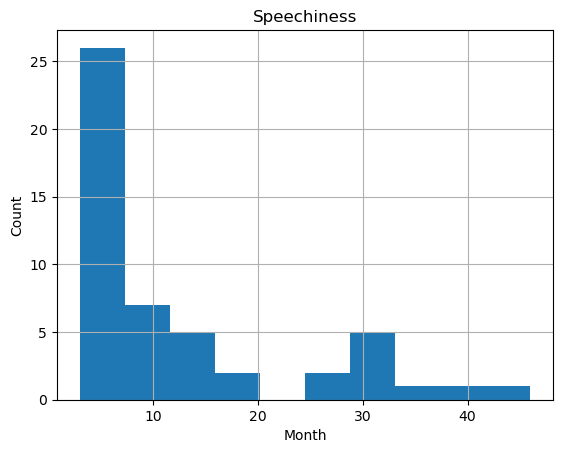

In [42]:
ax = df.hist(column='Speechiness')

for a in ax.flatten():
    a.set_xlabel('Month')
    a.set_ylabel('Count')

In [43]:
# Query the speechiness of the songs that have the word 'rap' in their genre
c.execute('''
            SELECT TrackName, Genre, Speechiness
            FROM TopSongs
            WHERE Genre LIKE '%rap%';
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,TrackName,Genre,Speechiness
0,Goodbyes (Feat. Young Thug),dfw rap,7
1,Ransom,trap music,29
2,Old Town Road - Remix,country rap,10
3,Sunflower - Spider-Man: Into the Spider-Verse,dfw rap,5
4,Panini,country rap,8


In [44]:
# Query the Speechiness of songs that have the speechiness value above or equal to 33
c.execute('''
            SELECT TrackName, Genre, Speechiness
            FROM TopSongs
            WHERE Speechiness >= 33;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,TrackName,Genre,Speechiness
0,boyfriend (with Social House),dance pop,46
1,bad guy,electropop,38
2,7 rings,dance pop,33
3,Otro Trago,panamanian pop,34


In [45]:
# Query the percentage of songs that have the speechiness of 33 or above
c.execute('''
            SELECT ((SELECT COUNT(*)*1.0
            FROM TopSongs
            WHERE Genre LIKE '%pop%' AND Speechiness >= 33)/COUNT(*)*1.0)*100 AS PopPercentageWithHighSpeechiness
            FROM TopSongs
            WHERE Genre LIKE '%pop%';
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,PopPercentageWithHighSpeechiness
0,17.391304


In [46]:
# Look at the top songs to see if they are above or below the average Speechiness
c.execute('''
            SELECT TrackName, Speechiness,
            (CASE
                WHEN Speechiness > 12.48 THEN 'Above Average'
                WHEN Speechiness = 12.48 THEN 'Average'
                WHEN Speechiness < 12.48 THEN 'Below Average'
            END) As CompareAvg
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,TrackName,Speechiness,CompareAvg
0,Señorita,3,Below Average
1,China,9,Below Average
2,boyfriend (with Social House),46,Above Average
3,Beautiful People (feat. Khalid),19,Above Average
4,Goodbyes (Feat. Young Thug),7,Below Average
5,I Don't Care (with Justin Bieber),4,Below Average
6,Ransom,29,Above Average
7,How Do You Sleep?,9,Below Average
8,Old Town Road - Remix,10,Below Average
9,bad guy,38,Above Average


In [47]:
# Look at the top songs to see how far away they are from the average Speechiness
c.execute('''
            SELECT TrackName, Speechiness,
            (CASE
                WHEN Speechiness BETWEEN 9.48 and 15.48 THEN 'Within 3'
                WHEN (Speechiness BETWEEN 6.48 and 9.47) OR (Speechiness BETWEEN 15.49 and 18.48) THEN 'Within 6'
                WHEN (Speechiness BETWEEN 3.38 and 6.47) OR (Speechiness BETWEEN 18.49 and 21.48) THEN 'Within 9'
                ELSE 'Greater than 9'
            END) As CompareAverage
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,TrackName,Speechiness,CompareAverage
0,Señorita,3,Greater than 9
1,China,9,Within 6
2,boyfriend (with Social House),46,Greater than 9
3,Beautiful People (feat. Khalid),19,Within 9
4,Goodbyes (Feat. Young Thug),7,Within 6
5,I Don't Care (with Justin Bieber),4,Within 9
6,Ransom,29,Greater than 9
7,How Do You Sleep?,9,Within 6
8,Old Town Road - Remix,10,Within 3
9,bad guy,38,Greater than 9


In [48]:
# Count down all the songs as per their 'Speechiness' range
c.execute('''
            SELECT
            SUM(CASE
                WHEN Speechiness BETWEEN 9.48 AND 15.48 THEN 1
                ELSE 0
            END) As Within3,
            SUM(CASE
                WHEN (Speechiness BETWEEN 6.48 AND 9.47) OR (Speechiness BETWEEN 15.49 AND 18.48) THEN 1
                ELSE 0
            END) As Within6,
            SUM(CASE
                WHEN (Speechiness BETWEEN 3.48 AND 6.47) OR (Speechiness BETWEEN 18.49 AND 21.48) THEN 1
                ELSE 0
            END) As Within9,
            SUM(CASE
                WHEN (Speechiness < 3.48) OR (Speechiness > 21.48) THEN 1
                ELSE 0
            END) As Greater9
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,Within3,Within6,Within9,Greater9
0,8,8,17,17


In [49]:
# QUery the average popularity in TopSongs
c.execute('''
            SELECT AVG(Popularity)
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,AVG(Popularity)
0,87.5


In [50]:
# Query the most popular songs in TopSongs
c.execute('''
            SELECT TrackName, Popularity
            FROM TopSongs
            ORDER BY Popularity DESC;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,TrackName,Popularity
0,bad guy,95
1,Goodbyes (Feat. Young Thug),94
2,Callaita,93
3,China,92
4,Ransom,92
5,Money In The Grave (Drake ft. Rick Ross),92
6,Sunflower - Spider-Man: Into the Spider-Verse,91
7,Truth Hurts,91
8,Piece Of Your Heart,91
9,Panini,91


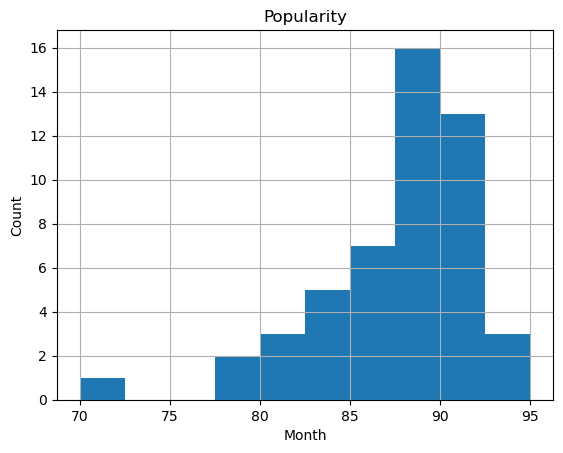

In [51]:
ax = df.hist(column='Popularity')

for a in ax.flatten():
    a.set_xlabel('Month')
    a.set_ylabel('Count')

In [52]:
# Look at the top songs to se if they are above or below the average popularity
c.execute('''
            SELECT TrackName, Popularity,
            (CASE
                WHEN Popularity > 87.5 THEN 'Above Average'
                WHEN Popularity < 87.5 THEN 'Below Average'
                WHEN Popularity = 87.5 THEN 'Average'
            END) AS CompareAverage
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,TrackName,Popularity,CompareAverage
0,Señorita,79,Below Average
1,China,92,Above Average
2,boyfriend (with Social House),85,Below Average
3,Beautiful People (feat. Khalid),86,Below Average
4,Goodbyes (Feat. Young Thug),94,Above Average
5,I Don't Care (with Justin Bieber),84,Below Average
6,Ransom,92,Above Average
7,How Do You Sleep?,90,Above Average
8,Old Town Road - Remix,87,Below Average
9,bad guy,95,Above Average


In [53]:
# Look at the top songs to see how far away they are from the average Popularity
c.execute('''
            SELECT TrackName, Popularity,
            (CASE
                WHEN Popularity BETWEEN 84.5 and 90.5 THEN 'Within 3'
                WHEN (Popularity BETWEEN 81.5 and 84.4) OR (Popularity BETWEEN 90.6 and 93.5) THEN 'Within 6'
                WHEN (Popularity BETWEEN 78.5 and 81.4) OR (Popularity BETWEEN 93.6 and 96.5) THEN 'Within 9'
                ELSE 'Greater than 9'
            END) As CompareAverage
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,TrackName,Popularity,CompareAverage
0,Señorita,79,Within 9
1,China,92,Within 6
2,boyfriend (with Social House),85,Within 3
3,Beautiful People (feat. Khalid),86,Within 3
4,Goodbyes (Feat. Young Thug),94,Within 9
5,I Don't Care (with Justin Bieber),84,Within 6
6,Ransom,92,Within 6
7,How Do You Sleep?,90,Within 3
8,Old Town Road - Remix,87,Within 3
9,bad guy,95,Within 9


In [54]:
# Count down all the songs as per their 'Popularity' range
c.execute('''
            SELECT
            SUM(CASE
                WHEN Popularity BETWEEN 84.5 AND 90.5 THEN 1
                ELSE 0
            END) As Within3,
            SUM(CASE
                WHEN (Popularity BETWEEN 81.5 AND 84.4) OR (Popularity BETWEEN 90.6 AND 93.5) THEN 1
                ELSE 0
            END) As Within6,
            SUM(CASE
                WHEN (Popularity BETWEEN 78.5 AND 81.4) OR (Popularity BETWEEN 93.6 AND 96.5) THEN 1
                ELSE 0
            END) As Within9,
            SUM(CASE
                WHEN (Popularity < 78.5) OR (Popularity > 96.5) THEN 1
                ELSE 0
            END) As Greater9
            FROM TopSongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,Within3,Within6,Within9,Greater9
0,26,18,4,2


In [55]:
# Make a pandas DataFrame using the .csv file
df2 = pd.read_csv('/kaggle/input/spotify-streaming-history-2023/Streaming_History_Audio_2023_1.csv', encoding="ISO-8859-1")

# View the DataFrame
df2.head()

,ts,platform,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,shuffle,skipped
0,2023-05-13T15:35:46Z,ios,80189,why wait,eaup,why wait,True,False
1,2023-05-13T15:47:58Z,ios,2240,why wait,eaup,why wait,True,True
2,2023-05-13T15:50:59Z,ios,181237,Gora Gora Rang,AK,Cultural Tings 2,True,False
3,2023-05-13T15:55:31Z,ios,272453,Voh Dekhnay Mein,Ali Zafar,"London, Paris, New York (Original Motion Pictu...",True,False
4,2023-05-13T15:59:49Z,ios,233471,Aaftaab,The Local Train,Vaaqif,True,False


In [56]:
# Rename the column named to more readable format
df2.rename(columns = {'platform' : 'Platform', 
                      'ms_played' : 'Minutes_Played',
                      'master_metadata_track_name' : 'Track_Name',
                      'master_metadata_album_artist_name' : 'Artist_Name',
                      'master_metadata_album_album_name' : 'Album_Name',
                      'shuffle' : 'Shuffled',
                      'skipped' : 'Skipped'}, inplace=True)
df2.head()

,ts,Platform,Minutes_Played,Track_Name,Artist_Name,Album_Name,Shuffled,Skipped
0,2023-05-13T15:35:46Z,ios,80189,why wait,eaup,why wait,True,False
1,2023-05-13T15:47:58Z,ios,2240,why wait,eaup,why wait,True,True
2,2023-05-13T15:50:59Z,ios,181237,Gora Gora Rang,AK,Cultural Tings 2,True,False
3,2023-05-13T15:55:31Z,ios,272453,Voh Dekhnay Mein,Ali Zafar,"London, Paris, New York (Original Motion Pictu...",True,False
4,2023-05-13T15:59:49Z,ios,233471,Aaftaab,The Local Train,Vaaqif,True,False


In [57]:
# Convert pandas DataFrame into SQL table
df2.to_sql("MySongs", conn)

4427

In [58]:
# Write a query to see what the table looks like
c.execute('''
            SELECT *
            FROM MySongs;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,index,ts,Platform,Minutes_Played,Track_Name,Artist_Name,Album_Name,Shuffled,Skipped
0,0,2023-05-13T15:35:46Z,ios,80189,why wait,eaup,why wait,1,0
1,1,2023-05-13T15:47:58Z,ios,2240,why wait,eaup,why wait,1,1
2,2,2023-05-13T15:50:59Z,ios,181237,Gora Gora Rang,AK,Cultural Tings 2,1,0
3,3,2023-05-13T15:55:31Z,ios,272453,Voh Dekhnay Mein,Ali Zafar,"London, Paris, New York (Original Motion Pictu...",1,0
4,4,2023-05-13T15:59:49Z,ios,233471,Aaftaab,The Local Train,Vaaqif,1,0
...,...,...,...,...,...,...,...,...,...
4422,4422,2023-09-15T12:17:55Z,ios,245040,Titanium (feat. Sia),David Guetta,Nothing but the Beat,0,0
4423,4423,2023-09-15T12:20:45Z,ios,169523,Be My Lover (feat. La Bouche) - 2023 Mix,Hypaton,Be My Lover (feat. La Bouche),0,0
4424,4424,2023-09-15T12:23:27Z,ios,160766,Remember,Becky Hill,Remember,0,0
4425,4425,2023-09-15T12:39:51Z,windows,51480,Dhundhala,Yashraj,Dhundhala,1,0


In [59]:
# Write a query to see how many times a song has been played
# to guess the popularity
c.execute('''
            SELECT Track_Name, count(Track_Name)
            FROM MySongs
            GROUP BY Track_Name
            ORDER BY count(Track_Name) DESC;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,Track_Name,count(Track_Name)
0,Cheques,78
1,Comfortably Numb - Live At Pompeii 2016,46
2,Khayaal,40
3,Black & White,39
4,Bikhra,35
...,...,...
1677,99 Problems,1
1678,505,1
1679,4U,1
1680,0 to 100,1


In [60]:
# Write a query to see how many times songs from an
# artist has been played to guess the popularity
c.execute('''
            SELECT Artist_Name, count(Artist_Name)
            FROM MySongs
            GROUP BY Artist_Name
            ORDER BY count(Artist_Name) DESC;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,Artist_Name,count(Artist_Name)
0,Shubh,210
1,Abdul Hannan,145
2,Diljit Dosanjh,129
3,AP Dhillon,110
4,Pink Floyd,95
...,...,...
838,Abhilasha Sinha,1
839,Aastha Gill,1
840,AJR,1
841,6YNTHMANE,1


In [61]:
# Write a query to see how many times an album has been played
# to guess the popularity
c.execute('''
            SELECT Album_Name, count(Album_Name)
            FROM MySongs
            GROUP BY Album_Name
            ORDER BY count(Album_Name) DESC;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,Album_Name,count(Album_Name)
0,Still Rollin,121
1,Live At Pompeii,68
2,AM,66
3,The Wall,57
4,MoonChild Era,57
...,...,...
1358,1972 Obfusc/ation,1
1359,1965-67 Cambridge St/ation,1
1360,13 Reasons Why,1
1361,11:11,1


In [62]:
# Write a query to see how many times an album has been played
# to guess the popularity
c.execute('''
            SELECT Platform, count(Platform)
            FROM MySongs
            GROUP BY Platform
            ORDER BY count(Platform) DESC;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,Platform,count(Platform)
0,ios,2721
1,windows,1152
2,not_applicable,554


In [64]:
# Write a query to see how many times an song has been skipped
# to get to know which song is more irritating
c.execute('''
            SELECT Artist_Name, Track_Name, count(Skipped)
            FROM MySongs
            GROUP BY Artist_Name
            ORDER BY count(Skipped) DESC;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,Artist_Name,Track_Name,count(Skipped)
0,Shubh,No Love,210
1,Abdul Hannan,Haaray,145
2,Diljit Dosanjh,Peaches,129
3,AP Dhillon,TERE TE,110
4,Pink Floyd,Not Now John,95
...,...,...,...
838,Aega,BLAST EM',1
839,Abhilasha Sinha,Tum Ho Yahaan,1
840,Aastha Gill,Kyun,1
841,AJR,Sober Up (feat. Rivers Cuomo),1


In [66]:
# Write a query to see how many times a track from an
# artist has been played to guess the popularity
c.execute('''
            SELECT Artist_Name, Track_Name, count(Track_Name)
            FROM MySongs
            GROUP BY Track_Name
            ORDER BY count(Track_Name) DESC;
          ''')

data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,Artist_Name,Track_Name,count(Track_Name)
0,Shubh,Cheques,78
1,David Gilmour,Comfortably Numb - Live At Pompeii 2016,46
2,Talwiinder,Khayaal,40
3,Diljit Dosanjh,Black & White,39
4,Abdul Hannan,Bikhra,35
...,...,...,...
1677,Hugo,99 Problems,1
1678,Arctic Monkeys,505,1
1679,Maanu,4U,1
1680,Sidhu Moose Wala,0 to 100,1
